In [ ]:
from fastai import *
from fastai.vision import *

import warnings
warnings.filterwarnings('ignore', message='Default grid_sample and affine_grid behavior will be changed ')

In [ ]:
path = Path('/home/kushaj/Desktop/Data/temp/')
model_path = Path('/home/kushaj/Desktop/Data/trashdata/models/')

In [ ]:
test = (ImageList.from_folder(path)
                 .split_none()
                 .label_empty()
                 .transform(size=(256, 256))
                 .databunch(bs=1, val_bs=1)
                 .normalize(imagenet_stats))
test.valid_dl = test.train_dl

In [ ]:
learn = load_learner(model_path, file='resnet_256.pkl')

In [ ]:
result = []
for item in test.valid_ds:
    cat, _, _  = learn.predict(item[0])
    result.append([image2np(item[0].data), cat])

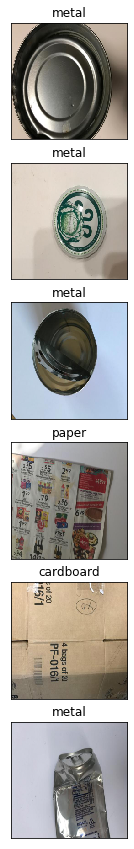

In [ ]:
fig, ax = plt.subplots(nrows=len(result), ncols=1, figsize=(15,15))
for i, a in enumerate(ax):
    img, cat = result[i]
    a.set_title(str(cat))
    a.set_xticks([])
    a.set_yticks([])
    a.imshow(img)